## **Testing SDF file reading and PDB conversation**

In [2]:
import urllib.request as ur
ur.urlretrieve("https://files.rcsb.org/download/6HGV.pdb", "6HGV.pdb")

('6HGV.pdb', <http.client.HTTPMessage at 0x1e81a686280>)

In [11]:
from openbabel import pybel

structures = []
ligands = []

for ligand in pybel.readfile("sdf", "results_vs_6hgv_6A_Gold.sdf"):
    ligands.append(ligand)
    
for structure in pybel.readfile("pdb", "6HGV.pdb"):
    structures.append(structure)

In [13]:
structures[0].write("pdb", "6HGV_pybel.pdb")

In [20]:
largePDBfile = pybel.Outputfile("pdb", "6HGV_multi.pdb")
largePDBfile.write(structures[0])
largePDBfile.write(ligands[0])
largePDBfile.close()

In [15]:
from plip.structure.preparation import PDBComplex

In [22]:
mol = PDBComplex()
mol.load_pdb("6HGV_multi.pdb")

In [23]:
print(mol)

Protein structure 6hgv with ligands:
MG:A:601
G3Q:A:602


In [24]:
for ligand in mol.ligands:
        mol.characterize_complex(ligand)

In [25]:
mol.interaction_sets

{'MG:A:601': <plip.structure.preparation.PLInteraction at 0x1e81d95de50>,
 'G3Q:A:602': <plip.structure.preparation.PLInteraction at 0x1e81dacdfd0>}

In [26]:
interaction = mol.interaction_sets["G3Q:A:602"]
# SALT BRIDGES
tmp_salt_bridges = interaction.saltbridge_lneg + interaction.saltbridge_pneg
Salt_Bridges = [''.join([str(i.resnr), str(i.reschain)]) for i in tmp_salt_bridges if i.restype not in ['LIG', 'HOH']]
# HYDROGEN BONDS
tmp_h_bonds = interaction.hbonds_pdon + interaction.hbonds_ldon
Hydrogen_Bonds = [''.join([str(i.resnr), str(i.reschain)]) for i in tmp_h_bonds if i.restype not in ['LIG', 'HOH']]
# PI STACKING
Pi_Stacking = [''.join([str(i.resnr), str(i.reschain)]) for i in interaction.pistacking if i.restype not in ['LIG', 'HOH']]
# PI CATION INTERACTION
tmp_pication = interaction.pication_laro + interaction.pication_paro
Pi_Cation_Interactions = [''.join([str(i.resnr), str(i.reschain)]) for i in tmp_pication if i.restype not in ['LIG', 'HOH']]
# HYDROPHOBIC CONTACTS
Hydrophobic_Contacts = [''.join([str(i.resnr), str(i.reschain)]) for i in interaction.hydrophobic_contacts if i.restype not in ['LIG', 'HOH']]
# HALOGEN BONDS
Halogen_Bonds = [''.join([str(i.resnr), str(i.reschain)]) for i in interaction.halogen_bonds if i.restype not in ['LIG', 'HOH']]
# WATER BRIDGES
Water_Bridges = [''.join([str(i.resnr), str(i.reschain)]) for i in interaction.water_bridges if i.restype not in ['LIG', 'HOH']]
# METAL COMPLEXES
Metal_Complexes = [''.join([str(i.resnr), str(i.reschain)]) for i in interaction.metal_complexes if i.restype not in ['LIG', 'HOH']]

In [27]:
Hydrophobic_Contacts

['336A', '381A', '381A', '417A', '497A', '498A', '499A']

In [28]:
largePDBfile = pybel.Outputfile("pdb", "6HGV_multi2.pdb")
largePDBfile.write(structures[0])
largePDBfile.write(ligands[0])
largePDBfile.write(ligands[1])
largePDBfile.close()

In [30]:
largePDBfile = pybel.Outputfile("pdb", "6HGV_multi3.pdb")
largePDBfile.write(structures[0])
largePDBfile.write(ligands[0])
largePDBfile.write(ligands[1])
largePDBfile.write(ligands[-1])
largePDBfile.close()

In [31]:
largePDBfile = pybel.Outputfile("pdb", "6HGV_multi4.pdb")
largePDBfile.write(structures[0])
largePDBfile.write(ligands[-1])
largePDBfile.close()

In [32]:
from openbabel import openbabel

In [43]:
ur.urlretrieve("https://files.rcsb.org/download/6HGV.pdb.gz", "6HGV.pdb.gz")

obConversion = openbabel.OBConversion()
obConversion.SetInAndOutFormats("pdb", "pdb")

mol = openbabel.OBMol()
obConversion.ReadFile(mol, "6HGV.pdb")   # Open Babel will uncompress automatically

obConversion.WriteFile(mol, '6HGV_openbabel.pdb')

True

In [42]:
mol.NumAtoms()

2825

#### **RDKit**

In [1]:
from rdkit import Chem

In [2]:
m = Chem.MolFromPDBFile('6HGV.pdb')

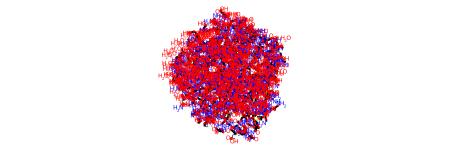

In [3]:
m

In [5]:
Chem.MolToPDBFile(m, "6HGV_rdkit.pdb")

In [7]:
ligands = [ x for x in Chem.SDMolSupplier('results_vs_6hgv_6A_Gold.sdf')]

In [23]:
combo = Chem.CombineMols(m, ligands[-1])

In [12]:
Chem.MolToPDBFile(combo, "6HGV_rdkit_multi.pdb")

In [13]:
Chem.MolToPDBFile(ligands[-1], "6HGV_rdkit_ligand.pdb")

In [16]:
mol = PDBComplex()
mol.load_pdb("6HGV_rdkit_multi.pdb")
print(mol)

Protein structure 6HGV_rdkit_multi_Protein with ligands:
MG:A:601
G3Q:A:602
UNL:Z:1


In [24]:
combo2 = Chem.CombineMols(combo, ligands[0])

In [25]:
Chem.MolToPDBFile(combo2, "6HGV_rdkit_multi2.pdb")

In [26]:
mol = PDBComplex()
mol.load_pdb("6HGV_rdkit_multi2.pdb")
print(mol)

Protein structure 6HGV_rdkit_multi2_Protein with ligands:
MG:A:601
G3Q:A:602
UNL:Z:1


#### **3KOO**

In [28]:
import urllib.request as ur
ur.urlretrieve("https://files.rcsb.org/download/3KOO.pdb", "3KOO.pdb")

('3KOO.pdb', <http.client.HTTPMessage at 0x1429812a760>)

In [29]:
from openbabel import openbabel

obConversion = openbabel.OBConversion()
obConversion.SetInAndOutFormats("pdb", "pdb")

mol = openbabel.OBMol()
obConversion.ReadFile(mol, "3KOO.pdb")   # Open Babel will uncompress automatically

obConversion.WriteFile(mol, "3KOO_openbabel.pdb")

True

In [33]:
from openbabel import pybel

structures = []
    
for structure in pybel.readfile("pdb", "3KOO.pdb"):
    structures.append(structure)
    
structures[0].write("pdb", "3KOO_pybel.pdb")

In [30]:
from rdkit import Chem
m = Chem.MolFromPDBFile("3KOO.pdb")
Chem.MolToPDBFile(m, "3KOO_rdkit.pdb")

In [31]:
#https://stackoverflow.com/questions/25718201/remove-heteroatoms-from-pdb

In [32]:
#https://stackoverflow.com/questions/25677167/how-to-extract-all-chains-from-a-pdb-file

In [1]:
from remove_ligand import clean_pdb

In [2]:
clean_pdb("3KOO.pdb", "3KOO_cleaned.pdb")

In [3]:
clean_pdb("6HGV.pdb", "6HGV_cleaned.pdb")

In [4]:
from rdkit import Chem
m = Chem.MolFromPDBFile('6HGV_cleaned.pdb')
ligands = [ x for x in Chem.SDMolSupplier('results_vs_6hgv_6A_Gold.sdf')]
combo = Chem.CombineMols(m, ligands[-1])
Chem.MolToPDBFile(combo, "6HGV_rdkit_cleaned_combo.pdb")

In [11]:
ligands[-1].GetPropsAsDict()

{'Clean Energy': 84.5744,
 'SourceTag': 'Livi_174a',
 'Activity_FLAP': 100,
 'Activity_sEH': 0.7,
 'Gold.Version': 5.2,
 'Gold.Id.Protein': '6HGV|6HGV_protein|mol2',
 'Gold.Goldscore.Fitness': 75.5638,
 'Gold.Goldscore.Internal.Vdw': -4.7058,
 'Gold.Goldscore.Internal.Torsion': -11.1857,
 'Gold.Goldscore.External.Vdw': 57.9923,
 'Gold.Goldscore.Internal.HBond': 0.0,
 'Gold.Goldscore.External.HBond': 0.2177,
 'Gold.Goldscore.Internal.Correction': -11.4982,
 'Gold.Goldscore.Hbonds': 'donor molecule, donor type, donor heavy atom, donor atom, acceptor molecule, acceptor atom, score\n      L1  H    25    47       P1  1931  0.11',
 'Gold.Goldscore.Internal.Vdw.Weighted': -4.7058,
 'Gold.Goldscore.Internal.Torsion.Weighted': -11.1857,
 'Gold.Goldscore.External.Vdw.Weighted': 79.7394,
 'Gold.Goldscore.Internal.HBond.Weighted': 0.0,
 'Gold.Goldscore.External.HBond.Weighted': 0.2177,
 'Gold.Goldscore.Internal.Correction.Weighted': -11.4982,
 'Gold.Protein.RotatedTorsions': '[ 3781 1176 1175 1172

In [14]:
ligands[-1].GetPropsAsDict()

{'Clean Energy': 84.5744,
 'SourceTag': 'Livi_174a',
 'Activity_FLAP': 100,
 'Activity_sEH': 0.7,
 'Gold.Version': 5.2,
 'Gold.Id.Protein': '6HGV|6HGV_protein|mol2',
 'Gold.Goldscore.Fitness': 75.5638,
 'Gold.Goldscore.Internal.Vdw': -4.7058,
 'Gold.Goldscore.Internal.Torsion': -11.1857,
 'Gold.Goldscore.External.Vdw': 57.9923,
 'Gold.Goldscore.Internal.HBond': 0.0,
 'Gold.Goldscore.External.HBond': 0.2177,
 'Gold.Goldscore.Internal.Correction': -11.4982,
 'Gold.Goldscore.Hbonds': 'donor molecule, donor type, donor heavy atom, donor atom, acceptor molecule, acceptor atom, score\n      L1  H    25    47       P1  1931  0.11',
 'Gold.Goldscore.Internal.Vdw.Weighted': -4.7058,
 'Gold.Goldscore.Internal.Torsion.Weighted': -11.1857,
 'Gold.Goldscore.External.Vdw.Weighted': 79.7394,
 'Gold.Goldscore.Internal.HBond.Weighted': 0.0,
 'Gold.Goldscore.External.HBond.Weighted': 0.2177,
 'Gold.Goldscore.Internal.Correction.Weighted': -11.4982,
 'Gold.Protein.RotatedTorsions': '[ 3781 1176 1175 1172

In [12]:
ligands[-1].SetProp("PDBResidueInfo", "LIG1")

In [13]:
combo = Chem.CombineMols(m, ligands[-1])
Chem.MolToPDBFile(combo, "6HGV_rdkit_cleaned_combo2.pdb")

In [15]:
combo.GetPropsAsDict()

{}

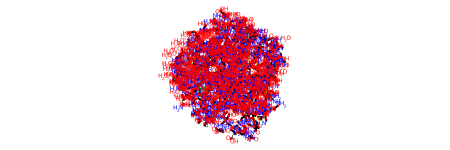

In [16]:
combo

In [17]:
combo = Chem.CombineMols(m, ligands[0])
Chem.MolToPDBFile(combo, "6HGV_rdkit_cleaned_combo3.pdb")

In [18]:
ligands[0].GetPropsAsDict()

{'CanonicalPdbName': '6HGV-G3Q_602_A',
 'Gold.Version': 5.2,
 'Gold.Id.Protein': '6HGV|6HGV_protein|mol2',
 'Gold.Goldscore.Fitness': 86.8066,
 'Gold.Goldscore.Internal.Vdw': -35.8588,
 'Gold.Goldscore.Internal.Torsion': -3.9449,
 'Gold.Goldscore.External.Vdw': 57.7637,
 'Gold.Goldscore.Internal.HBond': 0.0,
 'Gold.Goldscore.External.HBond': 7.9426,
 'Gold.Goldscore.Internal.Correction': -39.2426,
 'Gold.Goldscore.Hbonds': 'donor molecule, donor type, donor heavy atom, donor atom, acceptor molecule, acceptor atom, score\n      L1  H     6    28       P1   853  0.64\n      L1  H     9    27       P1   853  0.68',
 'Gold.Goldscore.Internal.Vdw.Weighted': -35.8588,
 'Gold.Goldscore.Internal.Torsion.Weighted': -3.9449,
 'Gold.Goldscore.External.Vdw.Weighted': 79.4251,
 'Gold.Goldscore.Internal.HBond.Weighted': 0.0,
 'Gold.Goldscore.External.HBond.Weighted': 7.9426,
 'Gold.Goldscore.Internal.Correction.Weighted': -39.2426,
 'Gold.Protein.RotatedTorsions': '[ 3781 1176 1175 1172 ] final -117

In [19]:
from biopandas.pdb import PandasPdb

In [31]:
pdb = PandasPdb().read_pdb("6HGV_rdkit_cleaned_combo2.pdb")

In [32]:
pdb.df["HETATM"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,HETATM,2558,,O,,HOH,,A,701,,...,-25.456,-10.575,-25.988,1.0,44.46,,,O,NaN,2558
1,HETATM,2559,,O,,HOH,,A,702,,...,-23.298,-16.416,-20.059,1.0,57.19,,,O,NaN,2559
2,HETATM,2560,,O,,HOH,,A,703,,...,6.654,-23.181,-43.808,1.0,67.09,,,O,NaN,2560
3,HETATM,2561,,O,,HOH,,A,704,,...,-27.408,-16.398,-23.146,1.0,52.26,,,O,NaN,2561
4,HETATM,2562,,O,,HOH,,A,705,,...,-7.795,4.960,-39.268,1.0,58.37,,,O,NaN,2562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,HETATM,2732,,N4,,UNL,,,1,,...,-15.677,-25.078,-37.187,1.0,0.00,,,N,NaN,2732
175,HETATM,2733,,O1,,UNL,,,1,,...,-8.592,-27.773,-35.164,1.0,0.00,,,O,NaN,2733
176,HETATM,2734,,S1,,UNL,,,1,,...,-14.967,-26.768,-35.143,1.0,0.00,,,S,NaN,2734
177,HETATM,2735,,CL1,,UNL,,,1,,...,-21.569,-24.876,-36.508,1.0,0.00,,,CL,NaN,2735


In [35]:
pdb.df["HETATM"].replace("UNL", "LIG1", inplace = True)

In [36]:
pdb.df["HETATM"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,HETATM,2558,,O,,HOH,,A,701,,...,-25.456,-10.575,-25.988,1.0,44.46,,,O,NaN,2558
1,HETATM,2559,,O,,HOH,,A,702,,...,-23.298,-16.416,-20.059,1.0,57.19,,,O,NaN,2559
2,HETATM,2560,,O,,HOH,,A,703,,...,6.654,-23.181,-43.808,1.0,67.09,,,O,NaN,2560
3,HETATM,2561,,O,,HOH,,A,704,,...,-27.408,-16.398,-23.146,1.0,52.26,,,O,NaN,2561
4,HETATM,2562,,O,,HOH,,A,705,,...,-7.795,4.960,-39.268,1.0,58.37,,,O,NaN,2562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,HETATM,2732,,N4,,LIG1,,,1,,...,-15.677,-25.078,-37.187,1.0,0.00,,,N,NaN,2732
175,HETATM,2733,,O1,,LIG1,,,1,,...,-8.592,-27.773,-35.164,1.0,0.00,,,O,NaN,2733
176,HETATM,2734,,S1,,LIG1,,,1,,...,-14.967,-26.768,-35.143,1.0,0.00,,,S,NaN,2734
177,HETATM,2735,,CL1,,LIG1,,,1,,...,-21.569,-24.876,-36.508,1.0,0.00,,,CL,NaN,2735


In [45]:
pdb.df["HETATM"].loc[pdb.df["HETATM"]["residue_name"] == "LIG1", "chain_id"] = "A"

In [46]:
pdb.df["HETATM"][pdb.df["HETATM"]["residue_name"] == "LIG1"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
149,HETATM,2707,,C1,,LIG1,,A,1,,...,-4.343,-31.233,-31.565,1.0,0.0,,,C,NaN,2707
150,HETATM,2708,,C2,,LIG1,,A,1,,...,-3.583,-31.435,-32.719,1.0,0.0,,,C,NaN,2708
151,HETATM,2709,,C3,,LIG1,,A,1,,...,-5.632,-30.690,-31.636,1.0,0.0,,,C,NaN,2709
152,HETATM,2710,,C4,,LIG1,,A,1,,...,-4.081,-31.104,-33.984,1.0,0.0,,,C,NaN,2710
153,HETATM,2711,,C5,,LIG1,,A,1,,...,-11.618,-27.227,-37.146,1.0,0.0,,,C,NaN,2711
154,HETATM,2712,,C6,,LIG1,,A,1,,...,-17.659,-25.142,-35.775,1.0,0.0,,,C,NaN,2712
155,HETATM,2713,,C7,,LIG1,,A,1,,...,-10.412,-27.769,-36.703,1.0,0.0,,,C,NaN,2713
156,HETATM,2714,,C8,,LIG1,,A,1,,...,-19.046,-25.091,-35.630,1.0,0.0,,,C,NaN,2714
157,HETATM,2715,,C9,,LIG1,,A,1,,...,-11.549,-25.607,-35.355,1.0,0.0,,,C,NaN,2715
158,HETATM,2716,,C10,,LIG1,,A,1,,...,-17.898,-24.863,-38.163,1.0,0.0,,,C,NaN,2716


In [1]:
from add_ligands import add_ligands

In [2]:
from add_ligands import get_ligands

In [3]:
ligands = get_ligands("results_vs_6hgv_6A_Gold.sdf")

In [1]:
# eventually because of overlapping atoms? not allowed in PDB

In [4]:
add_ligands("6HGV_cleaned.pdb", "6HGV_all.pdb", ligands)

LG1
LG2


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.CombineMols(NoneType, Mol)
did not match C++ signature:
    CombineMols(class RDKit::ROMol mol1, class RDKit::ROMol mol2, class RDGeom::Point3D offset=<rdkit.Geometry.rdGeometry.Point3D object at 0x0000021FE36BEEC0>)

In [7]:
from rdkit import Chem
m = Chem.MolFromPDBFile('6HGV_all.pdb')

In [8]:
m

In [12]:
from biopandas.pdb import PandasPdb
pdb1 = PandasPdb().read_pdb("6HGV_rdkit_ligand.pdb")
pdb2 = PandasPdb().read_pdb("6HGV_cleaned.pdb")

pdb1.df["HETATM"].loc[pdb1.df["HETATM"]["residue_name"] == "UNL", "chain_id"] = "A"
pdb1.df["HETATM"].replace("UNL", "LIG1", inplace = True)

pdb2.df["HETATM"] = pdb2.df["HETATM"].append(pdb1.df["HETATM"], ignore_index = True)

In [13]:
pdb2.df["HETATM"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,HETATM,2678,,O,,HOH,,A,701,,...,-25.456,-10.575,-25.988,1.0,44.46,,,O,NaN,5829
1,HETATM,2679,,O,,HOH,,A,702,,...,-23.298,-16.416,-20.059,1.0,57.19,,,O,NaN,5830
2,HETATM,2680,,O,,HOH,,A,703,,...,6.654,-23.181,-43.808,1.0,67.09,,,O,NaN,5831
3,HETATM,2681,,O,,HOH,,A,704,,...,-27.408,-16.398,-23.146,1.0,52.26,,,O,NaN,5832
4,HETATM,2682,,O,,HOH,,A,705,,...,-7.795,4.960,-39.268,1.0,58.37,,,O,NaN,5833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,HETATM,26,,N4,,LIG1,,A,1,,...,-15.677,-25.078,-37.187,1.0,0.00,,,N,NaN,26
175,HETATM,27,,O1,,LIG1,,A,1,,...,-8.592,-27.773,-35.164,1.0,0.00,,,O,NaN,27
176,HETATM,28,,S1,,LIG1,,A,1,,...,-14.967,-26.768,-35.143,1.0,0.00,,,S,NaN,28
177,HETATM,29,,CL1,,LIG1,,A,1,,...,-21.569,-24.876,-36.508,1.0,0.00,,,CL,NaN,29


In [17]:
pdb2.to_pdb("test.pdb")

#### **Testing PLIP analysis on results_vs_6hgv_6A_Gold.sdf**

In [1]:
from add_ligands import get_ligands, add_ligands

In [2]:
ligands = get_ligands("results_vs_6hgv_6A_Gold.sdf")

In [3]:
i = 1
pdb_paths = []
for ligand in ligands:
    outpath = "structures/6HGV_ligand" + str(i) + ".pdb"
    pdb_path = "6HGV_ligand" + str(i)
    pdb_paths.append(pdb_path)
    add_ligands("6HGV_cleaned.pdb", outpath, [ligand])
    i = i + 1

Adding ligand LG1 to file structures/6HGV_ligand1.pdb!
Adding ligand LG1 to file structures/6HGV_ligand2.pdb!
Adding ligand LG1 to file structures/6HGV_ligand3.pdb!
Adding ligand LG1 to file structures/6HGV_ligand4.pdb!
Adding ligand LG1 to file structures/6HGV_ligand5.pdb!
Adding ligand LG1 to file structures/6HGV_ligand6.pdb!
Adding ligand LG1 to file structures/6HGV_ligand7.pdb!
Adding ligand LG1 to file structures/6HGV_ligand8.pdb!
Adding ligand LG1 to file structures/6HGV_ligand9.pdb!
Adding ligand LG1 to file structures/6HGV_ligand10.pdb!
Adding ligand LG1 to file structures/6HGV_ligand11.pdb!
Adding ligand LG1 to file structures/6HGV_ligand12.pdb!
Adding ligand LG1 to file structures/6HGV_ligand13.pdb!
Adding ligand LG1 to file structures/6HGV_ligand14.pdb!
Adding ligand LG1 to file structures/6HGV_ligand15.pdb!
Adding ligand LG1 to file structures/6HGV_ligand16.pdb!
Adding ligand LG1 to file structures/6HGV_ligand17.pdb!
Adding ligand LG1 to file structures/6HGV_ligand18.pdb!
A

In [4]:
pdb_paths[:5]

['6HGV_ligand1',
 '6HGV_ligand2',
 '6HGV_ligand3',
 '6HGV_ligand4',
 '6HGV_ligand5']

In [5]:
from plip_analysis import analyze_structures

In [6]:
result = analyze_structures(pdb_paths)

Analyzing file:  structures/6HGV_ligand1.pdb
Analyzing file:  structures/6HGV_ligand2.pdb
Analyzing file:  structures/6HGV_ligand3.pdb
Analyzing file:  structures/6HGV_ligand4.pdb
Analyzing file:  structures/6HGV_ligand5.pdb
Analyzing file:  structures/6HGV_ligand6.pdb
Analyzing file:  structures/6HGV_ligand7.pdb
Analyzing file:  structures/6HGV_ligand8.pdb
Analyzing file:  structures/6HGV_ligand9.pdb
Analyzing file:  structures/6HGV_ligand10.pdb
Analyzing file:  structures/6HGV_ligand11.pdb
Analyzing file:  structures/6HGV_ligand12.pdb
Analyzing file:  structures/6HGV_ligand13.pdb
Analyzing file:  structures/6HGV_ligand14.pdb
Analyzing file:  structures/6HGV_ligand15.pdb
Analyzing file:  structures/6HGV_ligand16.pdb
Analyzing file:  structures/6HGV_ligand17.pdb
Analyzing file:  structures/6HGV_ligand18.pdb
Analyzing file:  structures/6HGV_ligand19.pdb
Analyzing file:  structures/6HGV_ligand20.pdb
Analyzing file:  structures/6HGV_ligand21.pdb
Analyzing file:  structures/6HGV_ligand22.p

C:\Users\Micha\anaconda3\envs\ProteinDocking\lib\site-packages\plip\basic\supplemental.py:90: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dm / cm)  # Round here to prevent floating point errors


Analyzing file:  structures/6HGV_ligand98.pdb
Analyzing file:  structures/6HGV_ligand99.pdb
Analyzing file:  structures/6HGV_ligand100.pdb
Analyzing file:  structures/6HGV_ligand101.pdb
Analyzing file:  structures/6HGV_ligand102.pdb
Analyzing file:  structures/6HGV_ligand103.pdb
Analyzing file:  structures/6HGV_ligand104.pdb
Analyzing file:  structures/6HGV_ligand105.pdb
Analyzing file:  structures/6HGV_ligand106.pdb
Analyzing file:  structures/6HGV_ligand107.pdb
Analyzing file:  structures/6HGV_ligand108.pdb
Analyzing file:  structures/6HGV_ligand109.pdb
Analyzing file:  structures/6HGV_ligand110.pdb
Analyzing file:  structures/6HGV_ligand111.pdb
Analyzing file:  structures/6HGV_ligand112.pdb
Analyzing file:  structures/6HGV_ligand113.pdb
Analyzing file:  structures/6HGV_ligand114.pdb
Analyzing file:  structures/6HGV_ligand115.pdb
Analyzing file:  structures/6HGV_ligand116.pdb
Analyzing file:  structures/6HGV_ligand117.pdb
Analyzing file:  structures/6HGV_ligand118.pdb
Analyzing file:

In [8]:
import json

In [9]:
with open("results/result.json", "w") as f:
    json.dump(result[0], f)
    
with open("results/result_freq.json", "w") as f:
    json.dump(result[1], f)
    
with open("results/result_struc.json", "w") as f:
    json.dump(result[2], f)

In [10]:
r = dict(sorted(result[1].items(), key = lambda x:x[1], reverse = True))

In [11]:
for key in list(r.keys())[:20]:
    print(key, "---", r[key])

Pi-Stacking:TRP336A --- 206
Hydrogen_Bond:ASP335A --- 195
Hydrogen_Bond:TYR466A --- 156
Hydrophobic_Interaction:TRP336A --- 135
Hydrophobic_Interaction:TYR466A --- 130
Hydrophobic_Interaction:ASN472A --- 115
Pi-Stacking:HIS524A --- 79
Water_Bridge:ASN472A --- 77
Hydrophobic_Interaction:TRP525A --- 67
Hydrophobic_Interaction:MET339A --- 65
Water_Bridge:TYR343A --- 65
Hydrogen_Bond:GLN384A --- 59
Hydrophobic_Interaction:TYR383A --- 55
Hydrophobic_Interaction:VAL498A --- 54
Hydrophobic_Interaction:LEU499A --- 53
Hydrophobic_Interaction:TYR343A --- 52
Hydrophobic_Interaction:THR360A --- 50
Hydrophobic_Interaction:TRP473A --- 42
Hydrophobic_Interaction:HIS524A --- 38
Hydrophobic_Interaction:ILE375A --- 36


![result](results/result.png)